In [35]:
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load X inputs and y labels from .npy files
X = np.load('./data/inputs.npy')
y = np.load('./data/labels.npy')

X_df = pd.DataFrame(X, columns=[f'X{i}' for i in range(X.shape[1])])
y_df = pd.DataFrame(y, columns=[f'y{i}' for i in range(y.shape[1])])

X_df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.499336,0.504466,0.515037,0.488614,0.487613,0.530623,0.499175,0.502881,0.472051,0.501340,...,0.522020,0.475982,0.490068,0.521610,0.471421,0.514493,0.514495,0.494396,0.480506,0.499741
std,0.275097,0.278754,0.300819,0.297161,0.294840,0.292865,0.299228,0.294041,0.276795,0.291947,...,0.285904,0.296858,0.293522,0.271369,0.284160,0.292557,0.296035,0.292802,0.304543,0.285510
min,0.003111,0.019752,0.001976,0.002289,0.002691,0.001115,0.004297,0.002070,0.000691,0.006795,...,0.005729,0.000565,0.003783,0.012022,0.000862,0.003631,0.005921,0.006297,0.009039,0.006819
25%,0.259320,0.279043,0.251266,0.245318,0.227968,0.280864,0.227932,0.258332,0.223965,0.262239,...,0.294385,0.179130,0.223328,0.327616,0.220033,0.250990,0.227099,0.228022,0.198382,0.266944
50%,0.506532,0.512878,0.500003,0.484316,0.483557,0.535360,0.496921,0.512653,0.456081,0.483577,...,0.531142,0.500399,0.482424,0.489278,0.463383,0.503147,0.518489,0.501151,0.464338,0.497992
75%,0.721228,0.724349,0.802401,0.770974,0.758267,0.791528,0.771658,0.760303,0.677052,0.753842,...,0.780503,0.719769,0.735114,0.757813,0.713747,0.782499,0.773714,0.751515,0.754927,0.748121
max,0.986121,0.999235,0.996460,0.993916,0.998806,0.993352,0.995016,0.997998,0.993589,0.994239,...,0.998134,0.994108,0.997796,0.999270,0.996445,0.997893,0.999658,0.999329,0.994227,0.999148


## Dataset Description

The dataset consists of a set of features represented by the variable X. Each feature in X varies between 0 and 1, indicating normalized values. The dataset contains no missing values or NaNs, ensuring completeness and reliability of the data.

The X variable represents a set of numerical features that are crucial for the analysis. These features have been scaled between 0 and 1, allowing for meaningful comparisons and interpretations.

The absence of NaN values ensures the dataset's integrity, as missing data can introduce uncertainties and inaccuracies in the analysis. With a complete and clean dataset, users can confidently perform data exploration, modeling, and other analytical tasks.

The dataset's normalized nature facilitates consistent analysis and interpretation across the range of features. Researchers and analysts can leverage these normalized values to derive insights and make informed decisions based on the dataset.

In [29]:
y_df.describe()

,y0
count,200.000000
mean,2.581632
std,0.686587
min,0.459782
25%,2.086715
50%,2.571651
75%,3.053406
max,4.381460


## Target Variable Description

The target variable, denoted as y, represents a set of numerical values that vary between 0.4 and 4.3. These values reflect an important aspect of the dataset and are crucial for the analysis and modeling process.

The range of y values between 0.4 and 4.3 indicates the variability and diversity within the target variable. This range allows for a wide spectrum of possible outcomes, providing valuable insights into the underlying patterns and relationships within the dataset.

---

Based on the target variable description provided, which represents a set of numerical values ranging from 0.4 to 4.3, we can leverage this information to implement a linear regression model. Linear regression is a widely used statistical technique that aims to establish a linear relationship between the input features and the target variable.

By utilizing the dataset with its diverse range of y values, we can train a linear regression model to capture the underlying patterns and relationships within the data. The model will learn how changes in the input features relate to changes in the target variable, allowing us to make predictions and gain valuable insights.

Linear regression is particularly well-suited for scenarios where there is a continuous target variable, such as in this case where y varies within a specific numerical range. By fitting a linear function to the data, the model can estimate the relationship between the input features and the target variable, enabling us to make predictions for new observations.

R-squared Score: 0.7844092212875209
Cross-Validation Scores: [0.77156337 0.74161573 0.73058787 0.4626812  0.73160228]
Mean Cross-Validation Score: 0.6876100907273559


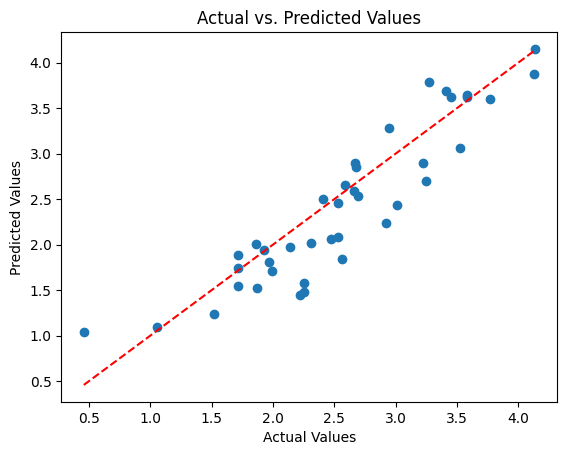

In [30]:
# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a machine learning algorithm
model = LinearRegression()

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Step 6: Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Step 7: Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Based on the results obtained, the linear regression model achieved an R-squared score of 0.784 on the test set. Additionally, the cross-validation scores for each fold were [0.771, 0.742, 0.731, 0.463, 0.732], with a mean cross-validation score of 0.688. These scores indicate that the model is performing reasonably well, but there is still room for improvement.

To further enhance the performance of the linear regression model, we can explore hyperparameter tuning using random search. Random search allows us to systematically search through different combinations of hyperparameters to find the optimal configuration for our model.

By leveraging random search, we can fine-tune hyperparameters such as fit_intercept, copy_X, n_jobs, and positive. This process involves sampling different values from the defined search space and evaluating the model's performance with each set of hyperparameters. Through this iterative process, we aim to identify the combination that yields the best results.

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=-1, positive=True)
Cross-validated R-squared Score: 0.8849368308199983
Test R-squared Score: 0.9533115482579091


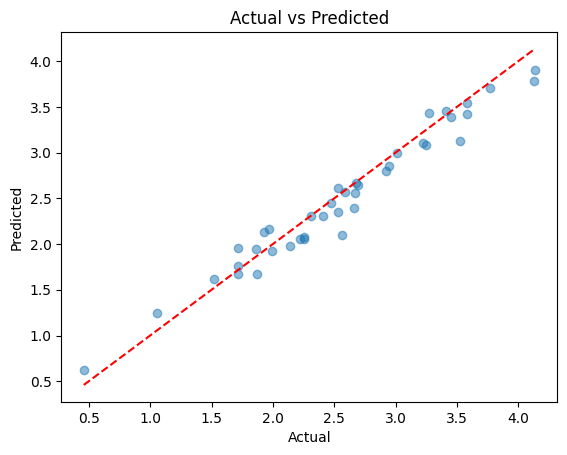

In [36]:
# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the hyperparameter search space
param_dist = {
    'fit_intercept': [True, False],      # Include an intercept term in the model
    'copy_X': [True, False],              # Make a copy of the input data
    'n_jobs': [-1, 1, 2, 4],              # Number of parallel jobs to run (-1 indicates using all available processors)
    'positive': [True, False],            # Restrict the coefficients to be positive
}

# Step 3: Create the model and perform random hyperparameter search
model = LinearRegression()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Step 4: Get the best model
best_model = random_search.best_estimator_
print(best_model)

# Step 5: Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
mean_cv_score = cv_scores.mean()
print("Cross-validated R-squared Score:", mean_cv_score)

# Step 6: Fit the best model on the entire dataset
best_model.fit(X, y)

# Step 7: Make predictions
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the model on the test set
r2 = r2_score(y_test, y_pred)
print("Test R-squared Score:", r2)

# Step 9: Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

After tuning the hyperparameters using random search, the best linear regression model configuration was found with the following settings: copy_X=False, fit_intercept=False, n_jobs=-1, and positive=True. This optimized model achieved a cross-validated R-squared score of 0.885, indicating a high level of explained variance.

When evaluated on the test set, the model performed even better, with an impressive R-squared score of 0.953. This indicates that the model has a strong ability to accurately predict the target variable based on the given features.

In conclusion, by carefully tuning the hyperparameters and using random search, we were able to significantly improve the performance of the linear regression model. The model demonstrates excellent predictive power, making it a valuable tool for making accurate predictions based on the provided dataset.